In [31]:
#from igraph import *
#import matplotlib

In [111]:
import networkx as nx
import collections
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [132]:
g = nx.read_edgelist('polbooks.txt',nodetype=int)

print('Number of nodes:', nx.number_of_nodes(g)) # number of nodes
print('\nNumber of edges:', nx.number_of_edges(g)) # number of edges

degree = dict(nx.degree(g))
partition = degree
print('\nDegree:\n',degree) #degree with their corresponding vertices_id

print('\nClustering Coeficient:\n',nx.clustering(g)) #clustring coefficient with their corresponding vertices_id
vertices_id = []
degreeXclustering_coefficient = dict() #deg_mul_cc

for i in degree.keys():
    degreeXclustering_coefficient[i] = degree[i] * nx.clustering(g)[i] #Multiplying clustering_coefficient with degree of corresponding vertices_id
    vertices_id.append(i)
copy_vertices_id = vertices_id
print('\nDegreeXclustring_coefficien:\n',degreeXclustering_coefficient)
MAX = max(degreeXclustering_coefficient.values())

Number of nodes: 105

Number of edges: 441

Degree:
 {0: 6, 1: 4, 2: 4, 3: 23, 4: 8, 5: 7, 6: 11, 7: 8, 8: 25, 9: 16, 10: 15, 11: 18, 12: 25, 13: 13, 14: 9, 15: 5, 16: 3, 17: 5, 18: 3, 19: 5, 20: 10, 21: 5, 22: 7, 23: 9, 24: 9, 25: 5, 26: 9, 27: 9, 28: 3, 29: 4, 30: 20, 31: 11, 32: 5, 33: 9, 34: 5, 35: 10, 36: 5, 37: 7, 38: 7, 39: 8, 40: 18, 41: 8, 42: 6, 43: 5, 44: 5, 45: 6, 46: 4, 47: 18, 48: 4, 49: 8, 50: 3, 51: 6, 52: 5, 53: 5, 54: 6, 55: 4, 56: 4, 57: 5, 58: 13, 59: 5, 60: 6, 61: 4, 62: 6, 63: 4, 64: 9, 65: 7, 66: 21, 67: 6, 68: 4, 69: 5, 70: 7, 71: 15, 72: 22, 73: 21, 74: 16, 75: 16, 76: 13, 77: 7, 78: 5, 79: 8, 80: 4, 81: 4, 82: 9, 83: 8, 84: 23, 85: 5, 86: 14, 87: 5, 88: 5, 89: 6, 90: 5, 91: 8, 92: 3, 93: 7, 94: 7, 95: 4, 96: 6, 97: 6, 98: 5, 99: 12, 100: 12, 101: 5, 102: 4, 103: 2, 104: 3}

Clustering Coeficient:
 {0: 0.6, 1: 0.8333333333333334, 2: 0.6666666666666666, 3: 0.20948616600790515, 4: 0.25, 5: 0.5238095238095238, 6: 0.18181818181818182, 7: 0.17857142857142858, 8: 0.2

In [133]:
dictionary = dict()
communities = []
remaining_vertices_id = []
while(True):
    degree = dict(nx.degree(g))   # degree of graph
    degreeXclustering_coefficient = dict()
    for i in degree.keys():
        #Multiplying clustering_coefficient with degree of corresponding vertices_id
        degreeXclustering_coefficient[i] = degree[i] * nx.clustering(g)[i] 
        vertices_id.append(i) 
        
        
    # frequency of vertices wiht same 'degree_x_clustering_coefficient'
    frequency_of_degreeXclustering_coefficient = collections.Counter(degreeXclustering_coefficient.values())
    print('\nfrequency of degreeXclustering_coefficient:\n',frequency_of_degreeXclustering_coefficient)

    max_degreeXclustering_coefficient = max(frequency_of_degreeXclustering_coefficient.keys())
    print('\nmax_degreeXclustering_coefficient:',max_degreeXclustering_coefficient)

    seeds = [key for key, value in degreeXclustering_coefficient.items() if value == max_degreeXclustering_coefficient]
    print('seeds:',seeds)
    length_of_seeds = len(seeds)
    if(length_of_seeds>0):
        max_deg = 0
        if(length_of_seeds==1):
            seed = seeds[0]
            max_deg = degree[seed]
        else:
            max_deg = degree[seeds[0]]
            seed = seeds[0]
            for s in seeds:
                if(degree[s]>max_deg): # It is also possible that all seeds have same number of  degree
                    max_deg = degree[s]
                    seed = s
    if(max_deg<3 or degreeXclustering_coefficient[seed]<math.floor(MAX/2)):
        break
    print('\nselected seed from seeds',seeds,':',seed)
    print('\nmax_Deg:',max_deg)
    community = []
    community.append(seed)
    community.extend(g.neighbors(seed))
    communities.append(community)
    print('community:',community)
    for k in community:
        g.remove_node(k)
        degreeXclustering_coefficient.pop(k, None)
    remaining_vertices_id = list(degreeXclustering_coefficient.keys())
    if(len(degreeXclustering_coefficient)==0):
        break    
print("Communities: ",communities)
print('\nremaining vertices id:',remaining_vertices_id)
print('\nNo of community:',len(communities))


frequency of degreeXclustering_coefficient:
 Counter({2.0: 12, 4.0: 8, 3.0: 7, 2.5: 6, 1.0: 4, 1.3333333333333333: 4, 2.6666666666666665: 3, 3.666666666666667: 3, 4.5: 3, 3.5999999999999996: 3, 4.3999999999999995: 3, 3.3333333333333335: 2, 1.5: 2, 4.9411764705882355: 2, 4.75: 2, 0: 1, 1.4285714285714286: 1, 4.818181818181818: 1, 5.294117647058823: 1, 6.333333333333334: 1, 6.909090909090909: 1, 5.6190476190476195: 1, 7.333333333333333: 1, 5.5: 1, 4.8: 1, 3.555555555555556: 1, 5.25: 1, 3.7142857142857144: 1, 5.333333333333333: 1, 4.4: 1, 0.6666666666666666: 1, 5.368421052631579: 1, 6.6: 1, 3.2: 1, 4.571428571428572: 1, 3.4285714285714284: 1, 1.6: 1, 4.727272727272727: 1, 4.285714285714286: 1, 3.333333333333333: 1, 4.923076923076923: 1, 4.333333333333333: 1, 3.8571428571428568: 1, 7.0: 1, 5.6: 1, 5.142857142857143: 1, 4.800000000000001: 1, 3.5: 1, 5.2: 1, 4.857142857142857: 1, 2.333333333333333: 1, 5.833333333333333: 1, 6.8: 1, 3.25: 1, 4.666666666666666: 1, 3.75: 1})

max_degreeXcluster

In [134]:
G = nx.read_edgelist('polbooks.txt',nodetype=int)
print('\nremaining vertices id:',remaining_vertices_id)
copy_vertices_id = list(set(copy_vertices_id))
print(copy_vertices_id)
while(len(remaining_vertices_id)>0):
    assign_to_remaining_vertices_id = []
    for i in remaining_vertices_id:
        neighbor = list(G.neighbors( i )) #finding the neighbors of remaning nodes
        print('neighbors of',i,' ', neighbor)
        max_common = []
        copy_max_common = []
        number_of_community = len(communities)
        for j in range (number_of_community):
            max_common.append(len(set(neighbor).intersection(set(communities[j]))))
            copy_max_common.append(len(set(neighbor).intersection(set(communities[j]))))
        max_common.sort()
        print('copy_max_common:',copy_max_common)
        print('max_common:',max_common)
        if(max_common[number_of_community-1] == max_common[number_of_community-2]):
            assign_to_remaining_vertices_id.append(i)
        else:
            index = (copy_max_common.index(max(copy_max_common)))
            communities[index].append(i)
        print(communities) 
    if(len(assign_to_remaining_vertices_id) == len(remaining_vertices_id)):
        x = max_common[-1]
        index = 0
        length = 0
        for j in range(len(copy_max_common)):
            if(x == copy_max_common[j]):
                length = len(communities[j])
                print(communities[j],j)
                index = j
        for k in range(len(copy_max_common)):
            if(x == copy_max_common[k] and len(communities[k])<length):
                length = len(communities)
                index = k
            
        communities[index].append(i)
        assign_to_remaining_vertices_id.remove(i)
        print('appended:',communities[index])
    remaining_vertices_id = assign_to_remaining_vertices_id;
    print('assign_to_remaining_vertices_id:',assign_to_remaining_vertices_id)
    print('reamainin vertices id:',remaining_vertices_id)


remaining vertices id: [15, 16, 17, 18, 19, 25, 28, 29, 34, 36, 38, 39, 47, 48, 49, 50, 53, 54, 55, 56, 57, 61, 66, 67, 68, 80, 81, 85, 86, 87, 88, 89, 90, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104]
neighbors of 15   [16, 10, 3, 12, 55]
copy_max_common: [0, 3, 0, 0, 0]
max_common: [0, 0, 0, 0, 3]
[[75, 70, 71, 72, 73, 74, 76, 77, 78, 79, 82, 83, 84, 91, 92, 30, 31], [8, 3, 9, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 26, 27, 32, 33, 35, 37, 40, 41, 42, 43, 44, 45, 46, 15], [51, 64, 65, 52, 69, 58], [63, 99, 59, 60, 62], [5, 0, 1, 2, 4, 6, 7]]
neighbors of 16   [10, 3, 15]


In [135]:
print(communities)

[[75, 70, 71, 72, 73, 74, 76, 77, 78, 79, 82, 83, 84, 91, 92, 30, 31, 66, 80, 81, 86, 87, 88, 89, 90, 93, 94, 95, 96, 97, 98, 100, 101, 102, 28], [8, 3, 9, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 26, 27, 32, 33, 35, 37, 40, 41, 42, 43, 44, 45, 46, 15, 16, 17, 18, 19, 25, 34, 36, 38, 39, 47, 48, 50, 53, 54, 55, 56, 57, 49], [51, 64, 65, 52, 69, 58, 68, 104, 67, 103, 85], [63, 99, 59, 60, 62, 61], [5, 0, 1, 2, 4, 6, 7, 29]]


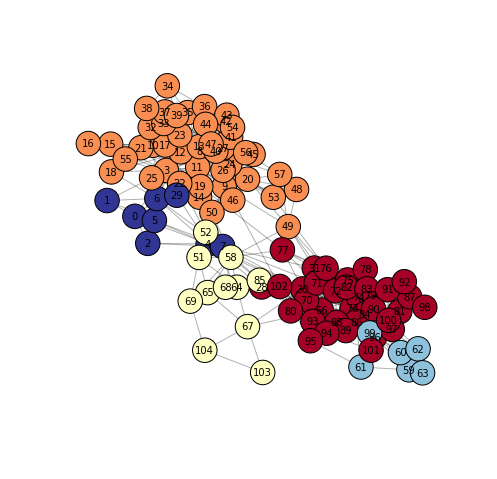

In [136]:
for i in partition.keys():
    for j in range(len(communities)):
        if i in communities[j]:
            partition[i] = j

# print(partition)
# print(partition.values())
# print(partition.keys())

labels={}
for i in G.nodes():
	labels[i] = i

pos = nx.spring_layout(G)  # compute graph layout
plt.figure(figsize=(8,8))  # image is 8 x 8 inches
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(g,pos,labels,font_size=10, font_color = 'k') 
plt.show(G)

In [137]:
from igraph import*
G = Graph.Read_Ncol('polbooks.txt', directed = False)
membership = []
for i in range(G.vcount()):
       membership.append(-1)
for v in G.vs:
	for cc in range(len(communities)):
		if(int(v['name']) in communities[cc]):
			membership[v.index] = cc

cl = Clustering(membership)
print(cl)
print("No. of Communities:",len(communities))
print("\nModularity:", G.modularity(cl.membership))   

Clustering with 105 elements and 5 clusters
[0] 28, 30, 31, 66, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
    84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102
[1] 3, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
    26, 27, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
    48, 49, 50, 53, 54, 55, 56, 57
[2] 51, 52, 58, 64, 65, 67, 68, 69, 85, 103, 104
[3] 59, 60, 61, 62, 63, 99
[4] 0, 1, 2, 4, 5, 6, 7, 29
No. of Communities: 5

Modularity: 0.5240820440042987


In [138]:
size_of_modularity_class =[]
for i in range(len(communities)):
    size_of_modularity_class.append(i)
number_of_nodes = []
print(size_of_modularity_class)
for community in communities:
    number_of_nodes.append(len(community))
print(number_of_nodes)    

[0, 1, 2, 3, 4]
[35, 45, 11, 6, 8]


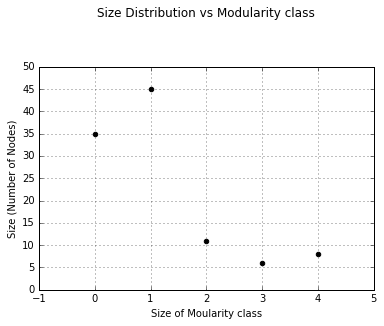

In [139]:
fig = plt.figure()
ax = fig.gca()

plt.title('Size Distribution vs Modularity class\n\n\n')
plt.xlabel('Size of Moularity class')
plt.ylabel('Size (Number of Nodes)')
ax.yaxis.set_major_locator(MaxNLocator(integer = True))
ax.xaxis.set_major_locator(MaxNLocator(integer = True))
plt.scatter(size_of_modularity_class,number_of_nodes,label = 'number of nodes', color = 'k')
plt.grid(True)
plt.show()

In [140]:
p = cl
print(p)
nmi = compare_communities(p.membership,partition.values(),method = 'nmi')
ari = compare_communities(p.membership,partition.values(),method = 'ari')
print(nmi)
print(ari)

Clustering with 105 elements and 5 clusters
[0] 28, 30, 31, 66, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
    84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102
[1] 3, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
    26, 27, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
    48, 49, 50, 53, 54, 55, 56, 57
[2] 51, 52, 58, 64, 65, 67, 68, 69, 85, 103, 104
[3] 59, 60, 61, 62, 63, 99
[4] 0, 1, 2, 4, 5, 6, 7, 29
1.0
1.0


In [141]:
x1 = [1,8,15]
y1 = [0.40,0.51,0.51]
x2 = [2,9,16]
y2 = [0.41,0.52,0.51]
x3 = [3,10,17]
y3 = [0.35,0.50,0.48]
x4 = [4,11,18]
y4 = [0.24,0.42,0.35]
x5 = [5,12,19]
y5 = [0.34,0.24,0.53]
x6 = [6,13,20]
y6 = [0.37,0.52,0.50]

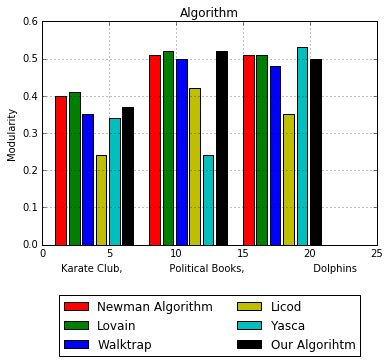

In [142]:
plt.bar(x1,y1,label = 'Newman Algorithm',color = 'r')
plt.bar(x2,y2,label = 'Lovain',color = 'g')
plt.bar(x3,y3,label = 'Walktrap',color = 'b')
plt.bar(x4,y4,label = 'Licod',color = 'y')
plt.bar(x5,y5,label = 'Yasca',color = 'c')
plt.bar(x6,y6,label = 'Our Algorihtm',color = 'k')
plt.title('Algorithm')
plt.xlabel('Karate Club,               Political Books,                      Dolphins')
plt.ylabel('Modularity')
plt.legend()
#plt.axis('on')
plt.grid('on')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.show()
